In [1]:
import pandas as pd

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [3]:
from datasets import load_dataset

In [4]:
data = load_dataset('lukebarousse/data_jobs')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [14]:
df = data['train'].to_pandas()

In [41]:
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [42]:
Aus_Job = df[df.job_country == 'Australia']

In [43]:
aus_jobs = Aus_Job[Aus_Job.salary_year_avg.notna()]

In [18]:
aus_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','mean']).sort_values(by = 'median',ascending = False)

,min,max,median,mean
job_title_short,,,,
Senior Data Scientist,157500.0,157500.0,157500.0,157500.000000
Senior Data Engineer,70000.0,155500.0,147500.0,119894.000000
Data Scientist,81000.0,170575.0,139216.0,139755.857143
Software Engineer,33455.0,257500.0,118350.0,140655.833333
Cloud Engineer,110000.0,110000.0,110000.0,110000.000000
Data Analyst,57500.0,135000.0,109500.0,102875.000000
Data Engineer,20000.0,160000.0,106712.5,112479.983333
Machine Learning Engineer,79200.0,185500.0,101029.0,122304.142857
Business Analyst,63000.0,130000.0,70000.0,87666.666667


In [10]:
import matplotlib.pyplot as plt


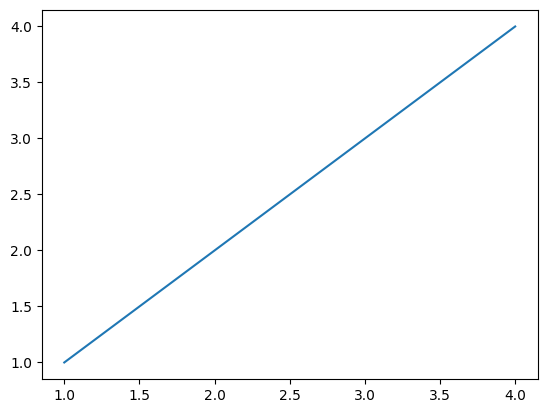

In [12]:
x= [1,2,3,4]
y= [1,2,3,4]

plt.plot(x,y)
plt.show()

In [37]:
aus_jobs.job_posted_date.head()

,job_posted_date
26330,2023-03-01
27637,2023-03-27
42522,2023-06-29
51626,2023-12-20
56804,2023-07-13


In [44]:
aus_jobs['job_posted_month'] = df['job_posted_date'].dt.month

<ipython-input-44-37a47b517ca2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_jobs['job_posted_month'] = df['job_posted_date'].dt.month


In [45]:
monthly_counts = aus_jobs.job_posted_month.value_counts()
monthly_counts= monthly_counts.sort_index()

In [47]:
monthly_counts

,count
job_posted_month,
1,6
2,6
3,9
4,10
5,3
6,6
7,12
8,5
9,3


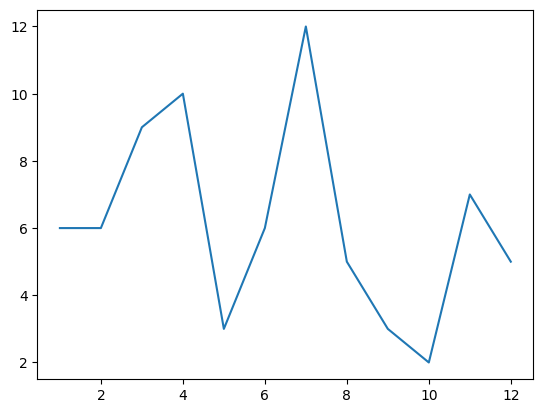

In [46]:
plt.plot(monthly_counts.index,monthly_counts)

In [52]:
job_counts = aus_jobs.job_title_short.value_counts().sort_values(ascending= True)

Text(0, 0.5, 'Skills')

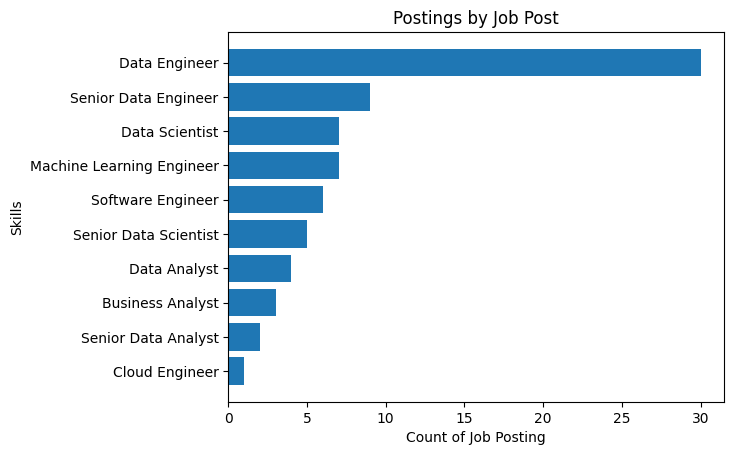

In [55]:
plt.barh(job_counts.index,job_counts)
plt.title("Postings by Job Post")
plt.xlabel("Count of Job Posting")
plt.ylabel("Skills")

<Axes: xlabel='job_title_short'>

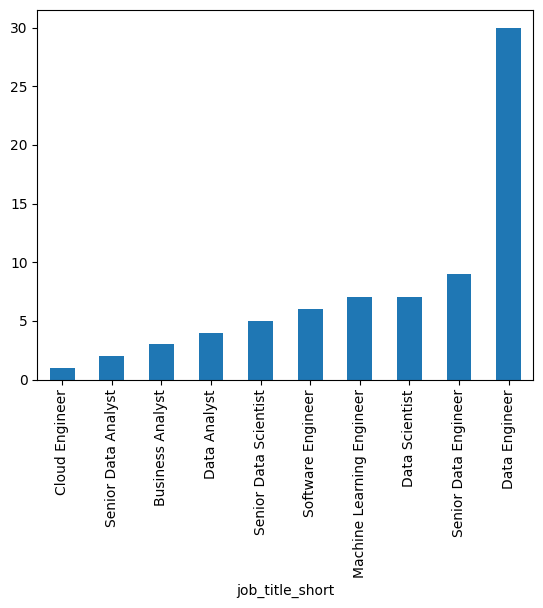

In [58]:
job_counts.plot(kind = 'bar')

<Axes: xlabel='job_posted_date'>

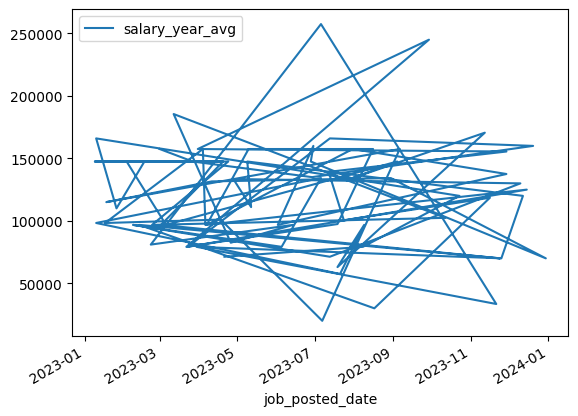

In [66]:
aus_jobs.plot(x= 'job_posted_date',y= 'salary_year_avg',kind = 'line')

Text(0.5, 0, 'Salary ($USD)')

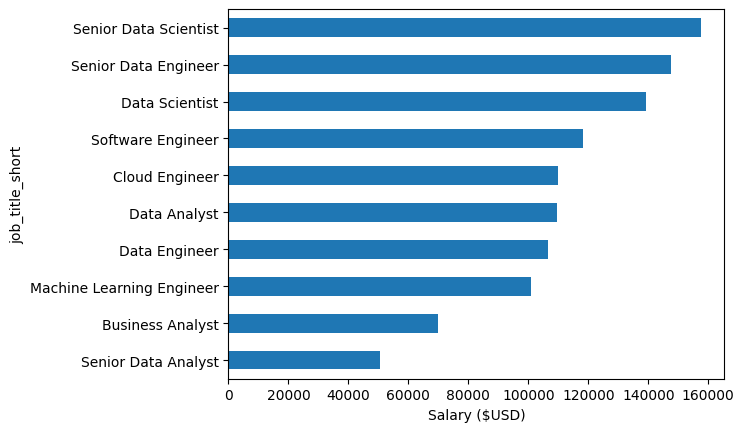

In [74]:
aus_jobs.groupby('job_title_short')['salary_year_avg'].median().sort_values().plot(kind = 'barh')
plt.xlabel("Salary ($USD)")